In [58]:
%matplotlib inline
from netCDF4 import Dataset
from pylab import *
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from spharm import Spharmt
from tqdm import tqdm
from matplotlib.backends.backend_pdf import PdfPages

from matplotlib.ticker import AutoMinorLocator

# cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
cmap = ListedColormap(sns.color_palette("coolwarm", 15).as_hex())
cubehelix = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)
sns.reset_orig()

matplotlib.rcParams['lines.linewidth'] = 0.6

matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['font.size'] = 7
matplotlib.rcParams['legend.frameon'] = False

matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['axes.facecolor'] = '#F8F8FF'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams['axes.labelsize'] = 7

matplotlib.rcParams['grid.linestyle'] = '-.'
matplotlib.rcParams['grid.linewidth'] = 0.4

matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['xtick.minor.size'] = 3
matplotlib.rcParams['xtick.minor.width'] = 0.7

matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.minor.size'] = 3
matplotlib.rcParams['ytick.minor.width'] = 0.7

In [2]:
def martians_year(ls, data):
    #### only looking at "second year"
    idx = np.where(ls==360)[0]
    if idx[0] != 0 and idx.size > 1:
        idx0 = idx[0]
        idx1 = idx[1]
        return data[idx0:idx1]
    elif idx[0] != 0 and idx.size == 1:
        return data[idx[0]:]
    elif idx[0] == 0:
        idx1 = idx[1]
        idx2 = idx[2]
        return data[idx1:idx2]

def martians_month(ls, data):
    temp = []
    for i in np.arange(0, 12):
        idx = np.where((ls>i*30)&(ls<(i+1)*30))[0]
        temp.append(data[idx].mean(axis=0))
    temp = np.array(temp)
    return temp

def zonal_plt_monthly(ydata, ls, data, title, level=12, norm=False, cmap=None):
    cmap=cmap or "viridis"
    from matplotlib.colors import SymLogNorm
    
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(14,12))
    for i, ax in enumerate(axes.flat):
        y = ydata[i][6:]
        
        #press2 = zonal_p[i-1].mean(axis=1)
        lat = np.linspace(-90, 90, 36) 
        temp_press = np.linspace(1e-2, 900, ydata[i].shape[0])[6:]
        
        lat, temp_press = np.meshgrid(lat, temp_press)
        
        d = data[i][6:]

        if norm:
            im = ax.contourf(lat, y, d, levels=level, cmap=cmap, norm=SymLogNorm(linthresh=1e5,vmin=np.min(d), vmax=np.max(d)))
            if not np.isnan(d).any():
                ax.contour(lat, y, d, levels=level, linewidths=0.5, colors='k', norm=SymLogNorm(linthresh=1e5,vmin=np.min(d), vmax=np.max(d)))
                
            ax.xaxis.set_minor_locator(AutoMinorLocator(4))
        else: 
            im = ax.contourf(lat, y, d, level, cmap=cmap, extend='both')
            for c in im.collections:
                c.set_edgecolor("face")
#             if not np.isnan(d).any():
#                 ax.contour(lat, y, d, level, linewidths=0.5, colors='k', extend='both')
        
        ax.xaxis.set_minor_locator(AutoMinorLocator(5))
        ax.set_title(r'{} LS {}-{}'.format((title), (i)*30, (i+1)*30))
        if i in [0,4,8]: ax.set_ylabel('Pressure [Pa]')
        if i in [8,9,10,11]: ax.set_xlabel('Latitude [$^\circ$]')
        ax.set_yscale('log')
        ax.set_ylim([900, 1e-2])
        ax.set_xlim([-95, 95])
        ax.grid(True, which='both')
        
#        print ('Saving 1st cool shit')
    fig.tight_layout()
    fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.3, orientation='horizontal', pad=0.05)


In [107]:
filedir = './wetL50_auxhist9.nc'
data = Dataset(filedir,'r')
ls = data.variables['LS'][:]
tau_od = data.variables['TAU_OD2D_AM'][:]
tau_od_p = data.variables['TAU_OD2D_PM'][:]
tau_cl = data.variables['TAU_CL2D_AM'][:]
tdiff = data.variables['T_PHY_DIFF'][:]
tpm = data.variables['T_PHY_AVG'][:]
data.close()

filedir = './wetL50_wrfout.nc'
data = Dataset(filedir,'r')
ls2 = data.variables['LS'][:]
t = data.variables['T'][:]
p = data.variables['P'][:]
data.close()

# p = martians_year(ls2, p)
# t = martians_year(ls2, t)
# ls2 = martians_year(ls2, ls2)
# p = martians_month(ls2, p)

# tdiff = martians_year(ls, tdiff)
# tau_od = martians_year(ls, tau_od)
# tau_od_p = martians_year(ls, tau_od_p)
# ls = martians_year(ls, ls)


/home/vsok/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: Mean of empty slice.
/home/vsok/.local/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/vsok/.local/lib/python3.6/site-packages/matplotlib/contour.py:1514: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/vsok/.local/lib/python3.6/site-packages/matplotlib/contour.py:1515: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


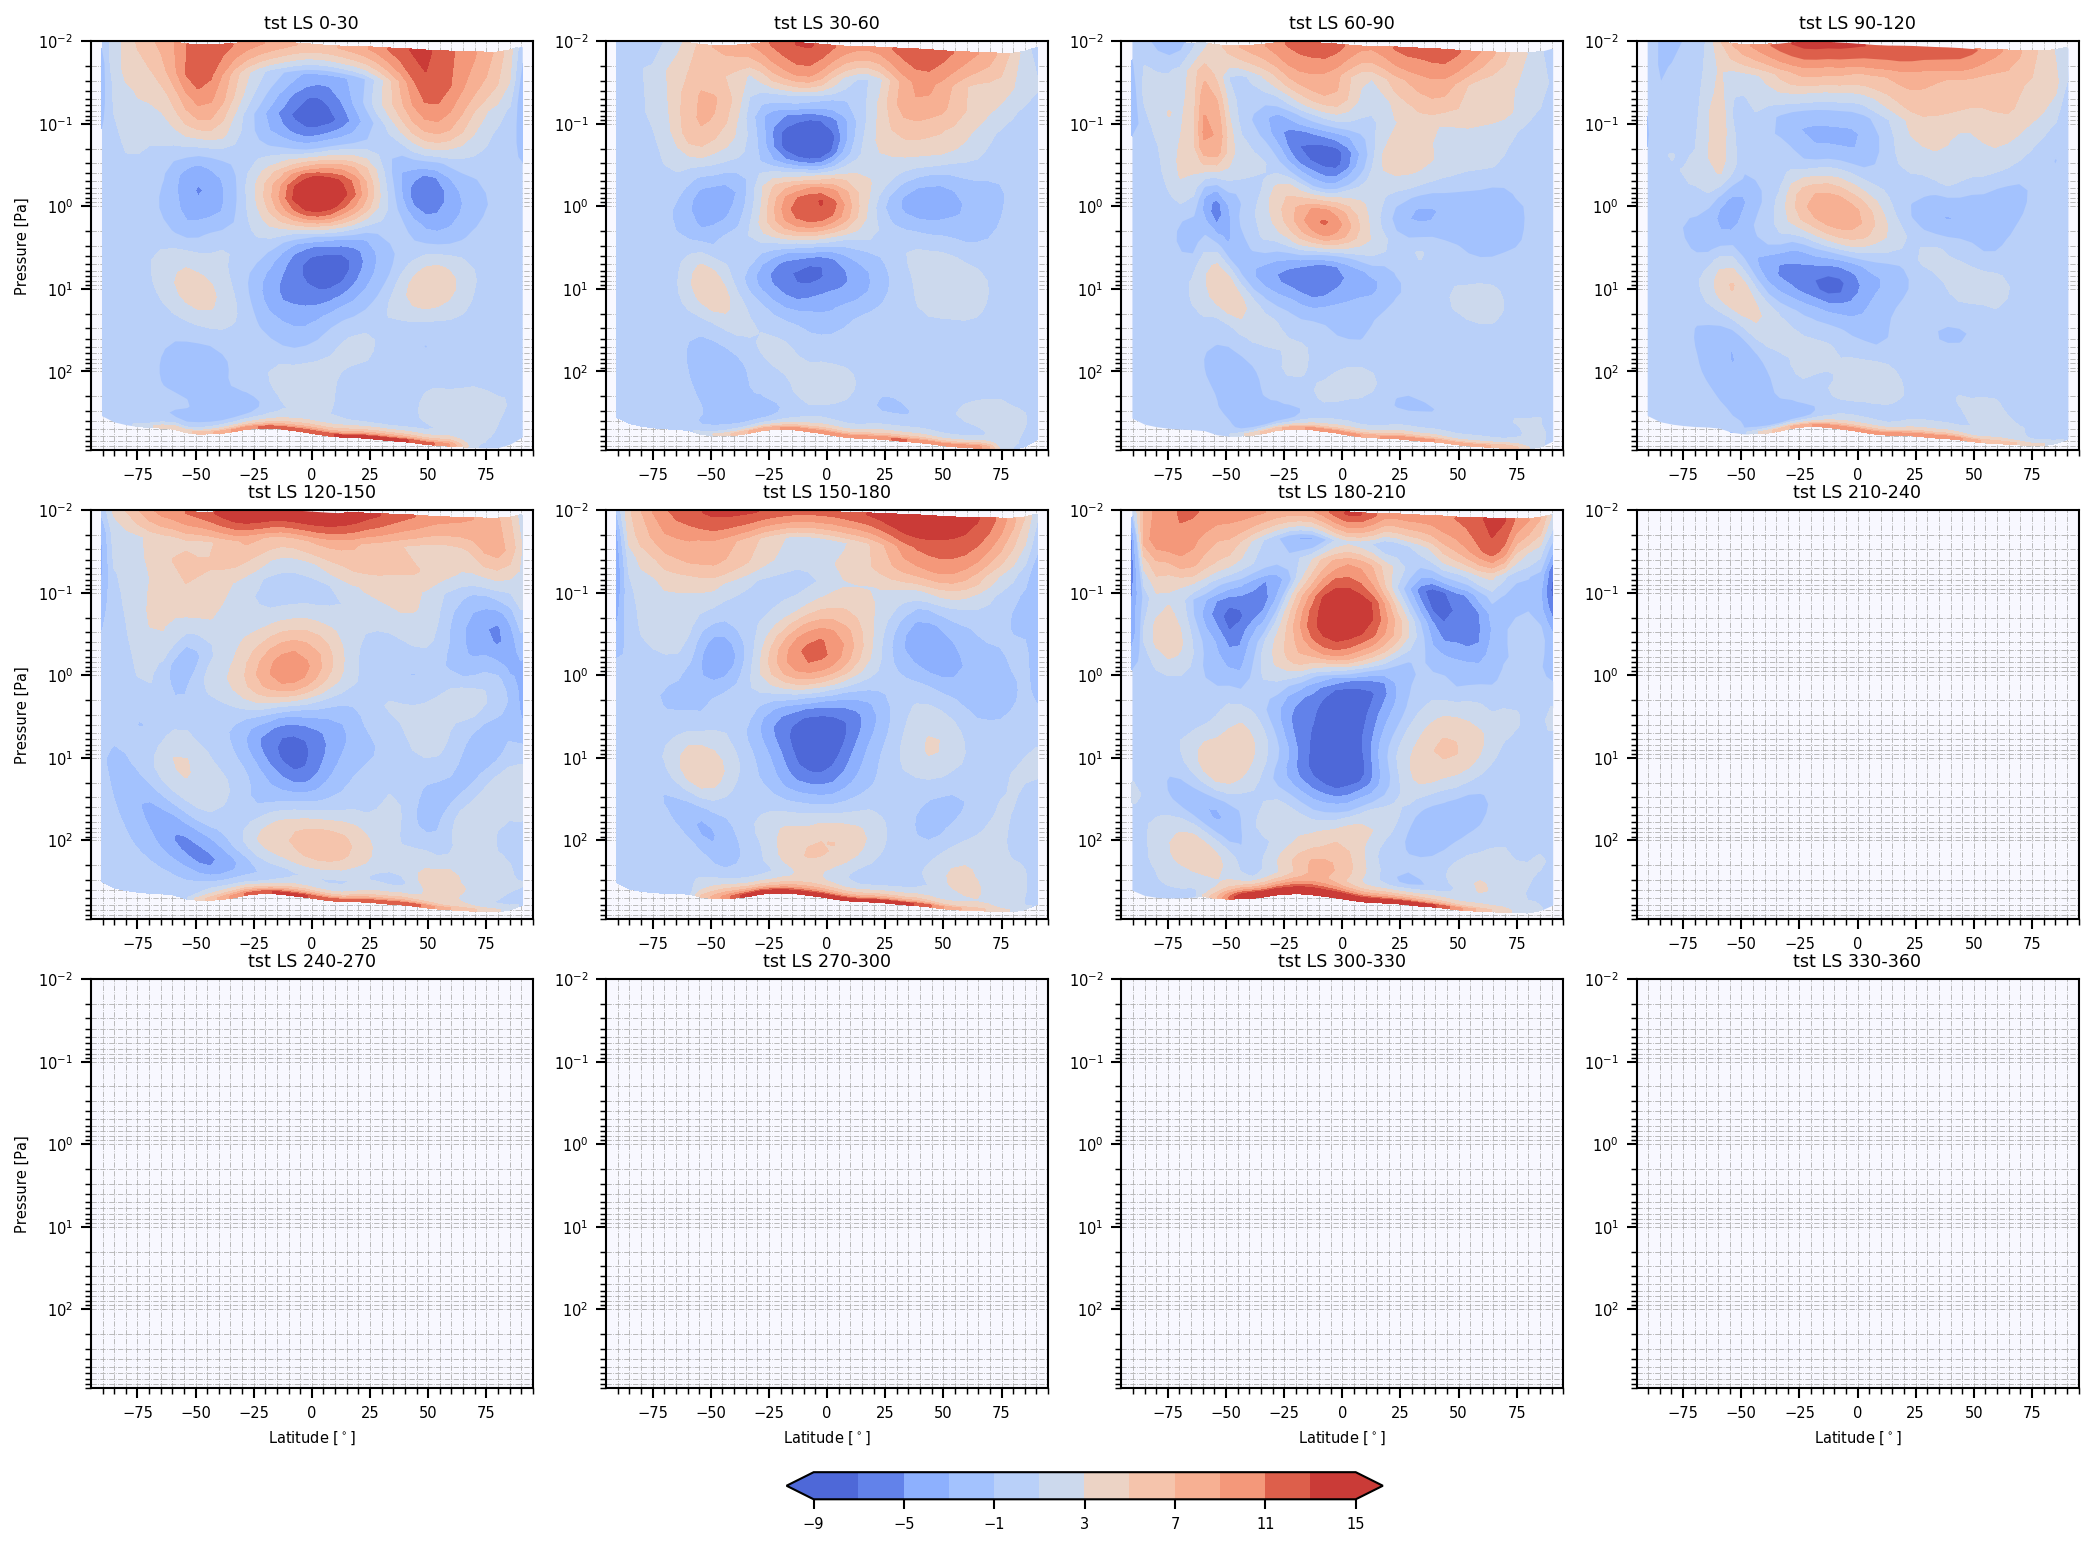

In [104]:

tdiff = martians_month(ls, tdiff)

zonal_plt_monthly(p, ls, tdiff, 'tst', level=np.linspace(-9,15,13), norm=False, cmap=cmap)

[[  2.28056987e-03   1.05268031e-03   1.75742351e-03 ...,  -4.24767168e-05
    2.63731088e-03   2.87089590e-03]
 [  3.36214289e-04  -1.57731381e-04   3.89048248e-03 ...,   5.13865054e-03
    5.43722091e-03   5.72217070e-03]
 [ -2.21058237e-03  -4.03440744e-03  -2.82021076e-03 ...,   3.20048281e-03
    3.10885068e-03  -1.33505603e-03]
 ..., 
 [ -2.31989007e-03   2.01042648e-03   8.42041150e-03 ...,  -4.53540822e-03
   -1.38616562e-03  -7.99040031e-03]
 [ -8.23010458e-04   1.18529797e-03   1.76057487e-03 ...,   1.03151659e-03
   -6.00612350e-03   3.72630102e-03]
 [  5.59932506e-03   3.04271653e-03   1.35224499e-03 ...,   8.20105150e-03
    9.23866034e-03   6.11247029e-03]]


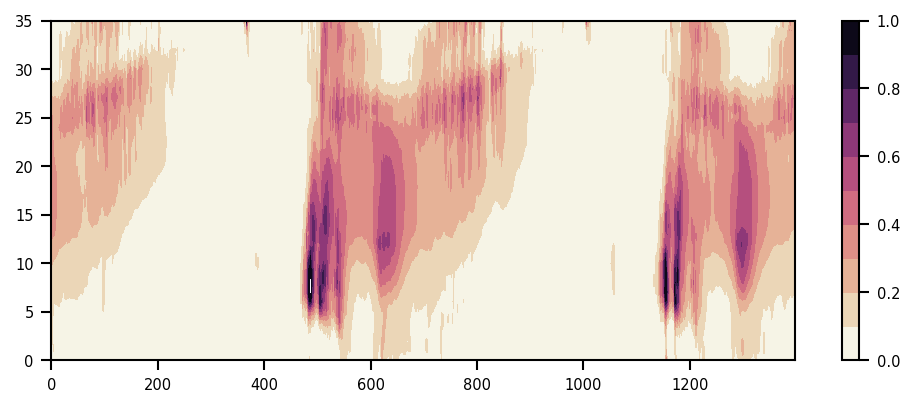

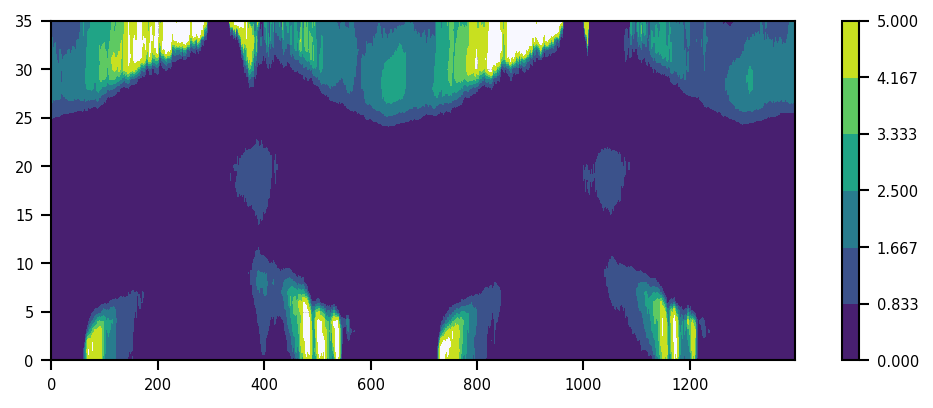

In [138]:
print((tau_od_p-tau_od).mean(axis=2).T)
import cubehelix 
cb = cubehelix.cmap(startHue=240,endHue=-300,minSat=1,maxSat=2.5,minLight=.3,maxLight=.8,gamma=.9)
cb2 = cubehelix.cmap(reverse=True, start=0., rot=0.5)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
contourf( (tau_od).mean(axis=2).T, np.linspace(0,1,11), cmap=cb2)
colorbar()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
contourf( tau_cl[:].mean(axis=2).T, np.linspace(0,5,7))
colorbar()

# figure(3)
# plot(ls, tmp[18])

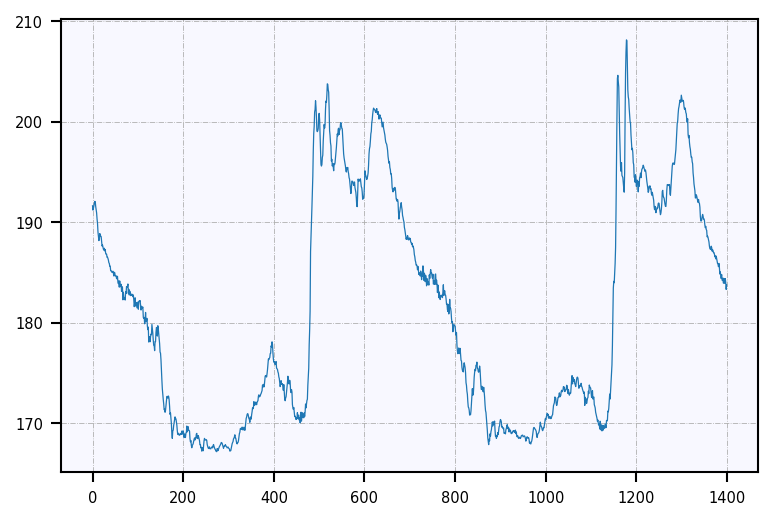

In [110]:
plot(t[:,25:30,17:20].mean(axis=2).mean(axis=1))

4it [00:48, 12.21s/it]


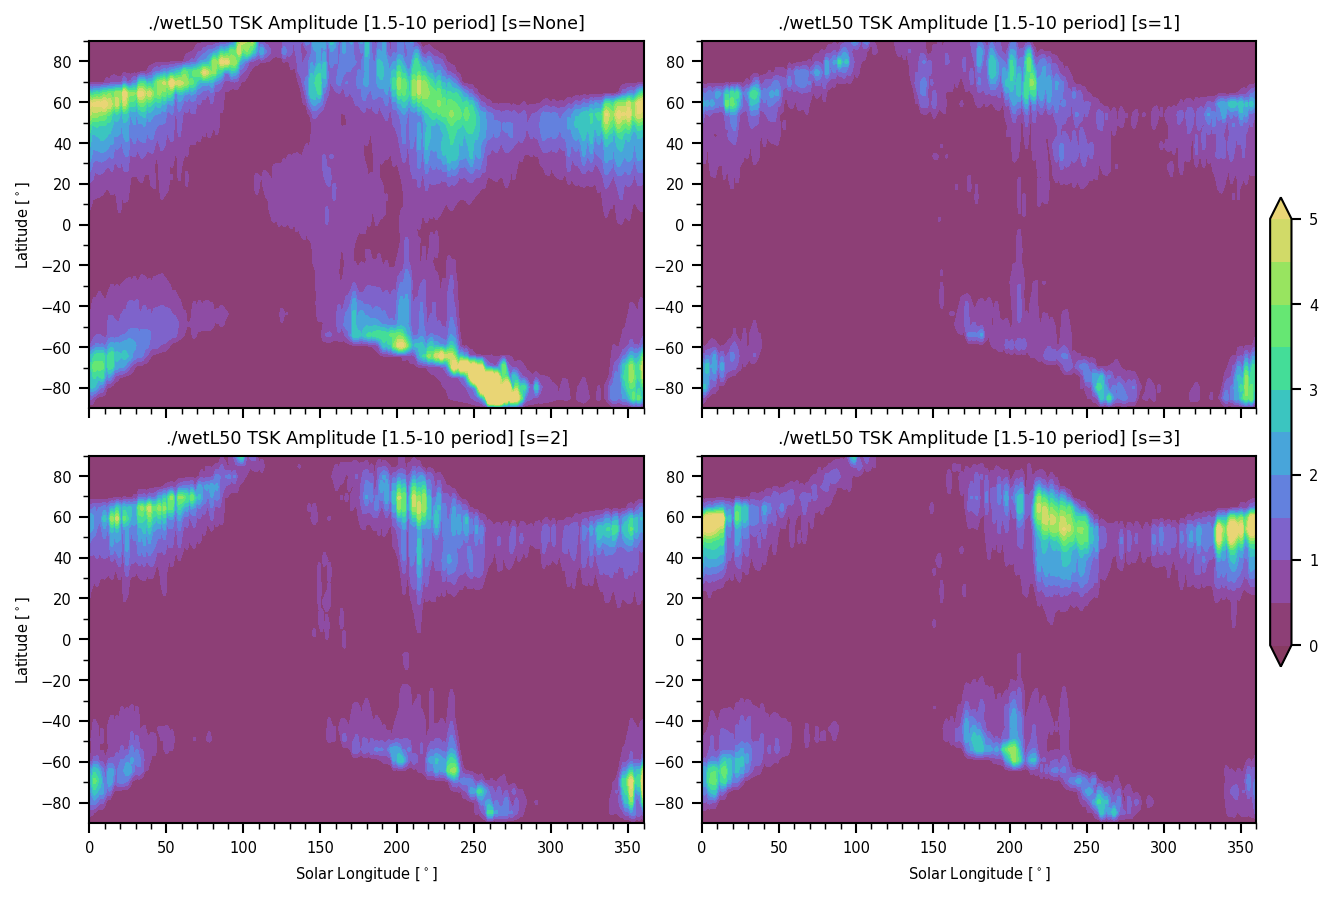

In [146]:
from matplotlib.backends.backend_pdf import PdfPages

def spect_v(ls, data, tstep, lonstep, lowcut, highcut, wave):
    lowcut = 1./lowcut
    highcut = 1./highcut
        
    fftdata = np.fft.fftn(data, axes=[0,2])
    freq = np.fft.fftfreq(fftdata.shape[0], tstep)
    waven = np.fft.fftfreq(fftdata.shape[2], lonstep)*360
    
    idx1 = np.where((abs(freq)>lowcut)|(abs(freq)<highcut))[0]
#     print (idx1, waven)
    
#     set everything that satisfy condition as zero, ie only filtering storm system
    fftdata[idx1] = 0
    if wave == 0:
        wave1_idx= np.where(((waven)!=wave))[0]
        fftdata[:,:,wave1_idx] = 0
    elif wave == None:
        pass
    elif wave > 0:
        wave1_idx= np.where(((waven)!=wave))[0]
        fftdata[:,:,wave1_idx] = 0
        fftdata = fftdata*2

    filtered = np.fft.ifftn(fftdata, axes=[0,2])
    filtered = np.abs(filtered)**2

    temp = filtered.mean(axis=2)
    return np.sqrt(temp)

def T2km_filter_waven(directory):
    
    filedir = directory+'_auxhist5.nc'
    data = Dataset(filedir,'r')
    ls = data.variables['LS'][:]
    psfc = data.variables['TSK'][:]
    data.close()

    wave = [None,1,2,3]
    psfc = martians_year(ls, psfc)
    ls = martians_year(ls, ls)

    title = directory.replace('./../marswrf/test_data/reduction_diag.','')
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6), sharex=True)
    for i, ax in tqdm(enumerate(axes.flat)):
        tst = spect_v(ls, psfc,  1/8., 5., 1.5, 10., wave[i])

        im = ax.contourf(np.linspace(0,360, 223), np.linspace(-90,90,36), tst.T.reshape((36,223,24)).mean(axis=2), np.linspace(0,5,11), extend='both', cmap = cb)
        for c in im.collections:
                c.set_edgecolor("face")
                
        ax.set_title('{} TSK Amplitude [1.5-10 period] [s={}]'.format(title, wave[i]))
        if i+1 in [1,3]:
            ax.set_ylabel('Latitude [$^\circ$]')
        if i in [2,3]:
            ax.set_xlabel('Solar Longitude [$^\circ$]')
        ax.xaxis.set_minor_locator(AutoMinorLocator(5))
        ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    fig.tight_layout()
    fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6, orientation='vertical', pad=0.01)
    
T2km_filter_waven("./wetL50")
# T2km_filter_waven("./wetL45")